In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from google.cloud import vision
from pdf2image import convert_from_path
from PIL import Image, ImageDraw, ImageFont
%aimport io
from pathlib import Path
import fitz  # PyMuPDF
%aimport os
from xml.sax.saxutils import escape

In [31]:
from data_processing.ocr_processing import build_processed_pdf, save_processed_pdf_data, load_processed_PDF_data, make_image_preprocess_mask

In [35]:
from data_processing.xml_processing import save_pages_to_xml

In [15]:
client = vision.ImageAnnotatorClient()

I0000 00:00:1733031170.773641 7446584 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [16]:
# def full_pdf_process(pdf_dir, pdf_filename, output_dir):
#     current_title, ext = os.path.splitext(pdf_filename)
#     assert ext == ".pdf", f"Expected .pdf, got {ext}"
#     text_pages, marked_images = build_processed_pdf(pdf_dir, pdf_filename)
#     save_annotated_text_and_image_data(output_dir, current_title, text_pages, marked_images)
#     save_xml_text_file(output_dir, current_title, text_pages)
#     return text_pages, marked_images

In [17]:
# directory to read pdfs from
pdf_dir =Path("../PDF/Phat_Giao_journals")

# directory to save output
output_dir = Path("../processed_journal_data")

In [18]:
pdf_to_process = pdf_dir / "phat-giao-viet-nam-1956-02.pdf"
basename = pdf_to_process.stem
pdf_to_process, basename

(PosixPath('../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-02.pdf'),
 'phat-giao-viet-nam-1956-02')

In [19]:
Path.exists(pdf_to_process)

True

In [20]:
pre_mask1 = make_image_preprocess_mask(0.1)

In [21]:
text_pages, word_locations_list, annotated_images, unannotated_images = build_processed_pdf(pdf_to_process, client, pre_mask1)

Processing document with 50 pages...
Processing page 1/50...
Processing page 2/50...
Processing page 3/50...
Processing page 4/50...
Processing page 5/50...
Processing page 6/50...
Processing page 7/50...
Processing page 8/50...
Processing page 9/50...
Processing page 10/50...
Processing page 11/50...
Processing page 12/50...
Processing page 13/50...
Processing page 14/50...
Processing page 15/50...
Processing page 16/50...
Processing page 17/50...
Processing page 18/50...
Processing page 19/50...
Processing page 20/50...
Processing page 21/50...
Processing page 22/50...
Processing page 23/50...
Processing page 24/50...
Processing page 25/50...
Processing page 26/50...
Processing page 27/50...
Processing page 28/50...
Processing page 29/50...
Processing page 30/50...
Processing page 31/50...
Processing page 32/50...
Processing page 33/50...
Processing page 34/50...
Processing page 35/50...
Processing page 36/50...
Processing page 37/50...
Processing page 38/50...
Processing page 39/50.

In [22]:
output_dir

PosixPath('../processed_journal_data')

In [23]:
save_processed_pdf_data(output_dir, basename, text_pages, word_locations_list, annotated_images, unannotated_images)

Processed data saved in: ../processed_journal_data/phat-giao-viet-nam-1956-02


In [30]:
text_pages, word_locations_list, annotated_images, unannotated_images = load_processed_PDF_data(Path("../processed_journal_data/phat-giao-viet-nam-1956-02"))

In [36]:
save_pages_to_xml(output_dir / basename / f"full_OCR_{basename}.xml", text_pages, overwrite=True)

XML file successfully saved at ../processed_journal_data/phat-giao-viet-nam-1956-02/full_OCR_phat-giao-viet-nam-1956-02.xml


In [54]:
from PIL import Image, ImageDraw

def footer_line_test(image_path, y_coordinate, x_coordinate):
    """
    Draws a horizontal line at a specified y-coordinate and a vertical line at a specified x-coordinate on an image.

    Parameters:
    - image_path (str): Path to the input image file.
    - y_coordinate (int): The y-coordinate where the horizontal line will be drawn.
    - x_coordinate (int): The x-coordinate where the vertical line will be drawn.

    Returns:
    - Image: The modified image with the drawn lines.
    
    Example:
    >>> footer_line_test("input.jpg", 500, 250)
    """
    # Load the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Get image dimensions
    width, height = image.size

    # Draw a horizontal line across the image
    draw.line([(0, y_coordinate), (width, y_coordinate)], fill="red", width=3)

    # Draw a vertical line across the image
    draw.line([(x_coordinate, 0), (x_coordinate, height)], fill="blue", width=3)

    return image

In [59]:
test_file = output_dir / "phat-giao-viet-nam-1956-09-10" / "images" / "page1.jpg"
test_file, test_file.exists()

(PosixPath('../processed_journal_data/phat-giao-viet-nam-1956-09-10/images/page1.jpg'),
 True)

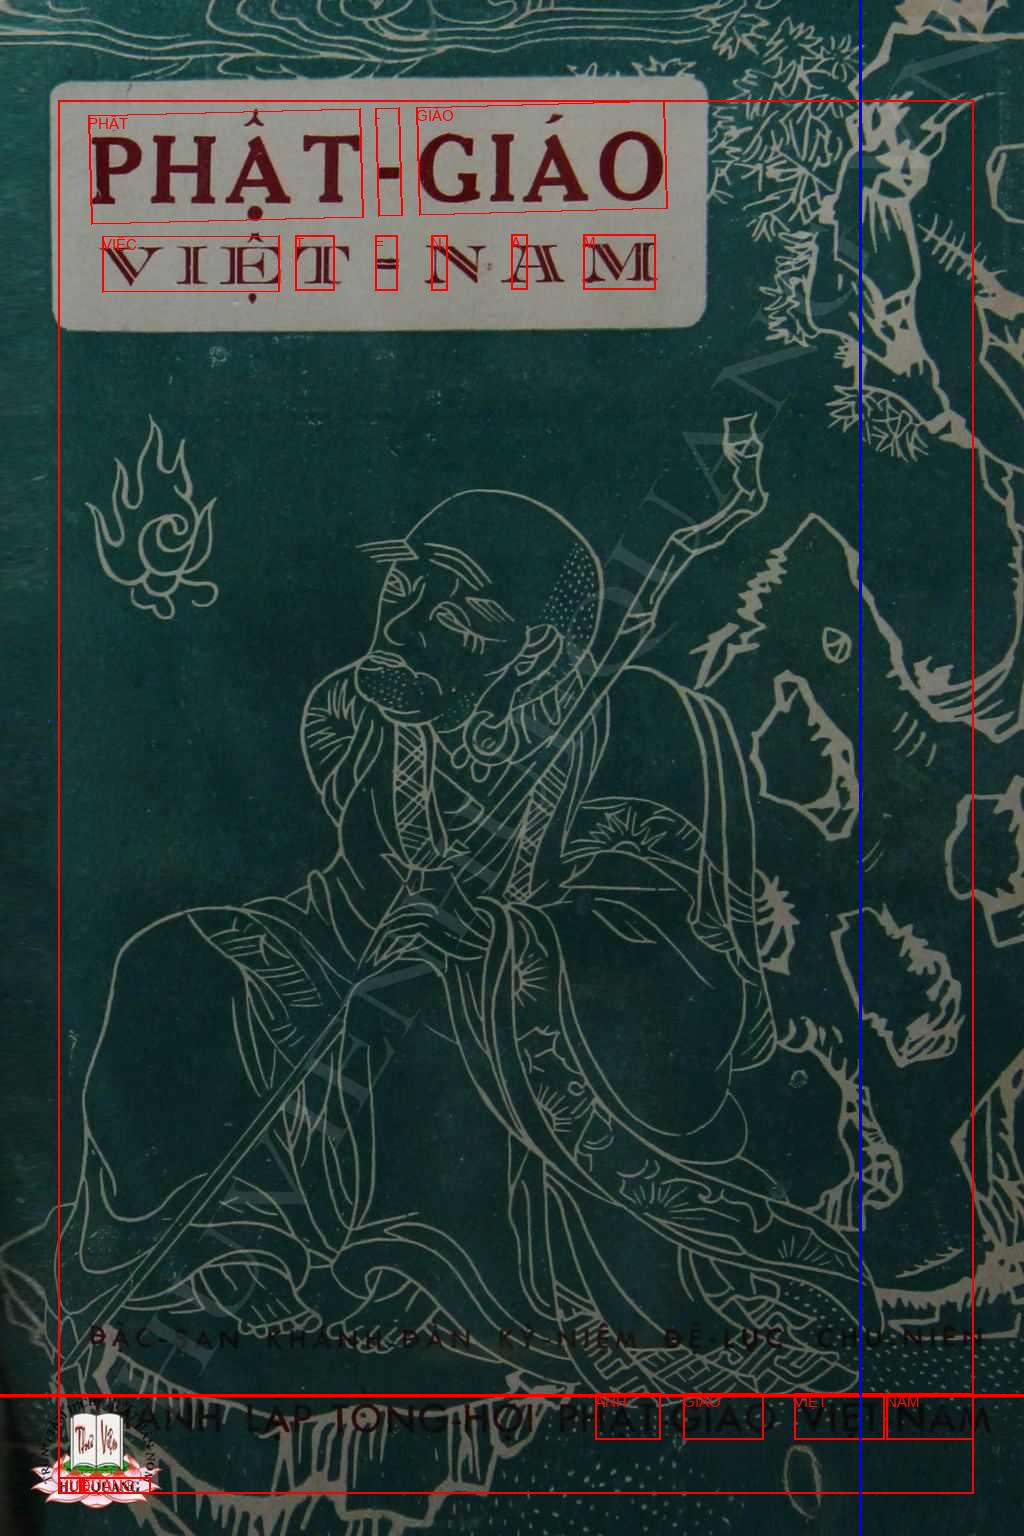

In [60]:
footer_line_test(test_file, 1395, 860)